In [ ]:
import pandas as pd 

df = pd.read_excel('2023-12-22736D-TableS6_RegionCellComposition.xlsx', sheet_name='Coronal section and region')

l_type = {}
negative_cell_type = {}

positive_cell_type = {}
no_cell_type = {}

for region in ['CTX', 'STR', 'VEN', 'CC/ACO', 'all regions']:
    print(region)
    p_values = region + ' (P-value)'
    pcc = region + ' (Pearson r)'
    #print('negative', df[(df[p_values].values < 0.05) & (df[pcc].values < -0.5)]['Cell type'].values)
    positive_cell_type[region] = df[(df[p_values].values < 0.05) & (df[pcc].values > 0.4)]['Cell type'].values
    negative_cell_type[region] = df[(df[p_values].values < 0.05) & (df[pcc].values < -0.4)]['Cell type'].values
    no_cell_type[region] = df[(df[p_values].values > 0.05)]['Cell type'].values
    

CTX
STR
VEN
CC/ACO
all regions


In [ ]:
import sys

sys.path.append('Haruka')

from Haruka import Haruka 



import scvi

scvi.utils.seed = 33


/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [ ]:
import scanpy as sc 

adata_full = sc.read_h5ad('aging_coronal.h5ad?download=1')

adata = adata_full[adata_full.obs['age'].isin([3.4, 34.5])].copy()


adata.obs['age'] = adata.obs['age'].astype('category')

adata.obs['slice_id'] = adata.obs['mouse_id'].values

# Create new labels based on cell types and regions
adata.obs['new_labels'] = adata.obs.apply(
    lambda x: 'positive' + '_' + x['region'] if x['celltype'] in positive_cell_type.get(x['region'], [])
    else ('negative'+ '_' + x['region'] if x['celltype'] in negative_cell_type.get(x['region'], [])
    else 'no' + '_' + x['region']), axis=1)


Identifying top 32 highly variable genes for COVET calculation
Computing COVET using 32 genes
Log-transforming expression data from X


Computing matrix square roots: 100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:12<00:00,  6.01s/it]
/lab/solexa_sun/lab_members/yancui/Haruka/scvi-tools/src/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nasun/solexa_sun/lab_members/nasun/tools/minic ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/lightning/f

Training:   0%|          | 0/200 [00:00<?, ?it/s]

/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/lightning/pytorch/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3234. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
`Trainer.fit` stopped: `max_epochs=200` reached.


INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


/lab/solexa_sun/lab_members/yancui/Haruka/scvi-tools/src/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[rank: 0] Seed set to 33
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nasun/solexa_sun/lab_members/nasun/tools/minic ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more d

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

[rank: 0] Seed set to 33
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nasun/solexa_sun/lab_members/nasun/tools/minic ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=13` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIB

Training: |                                                                                                   …

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                                                 …

/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/nasun/solexa_sun/lab_members/nasun/tools/miniconda3/envs/haru_repo_envi/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will b

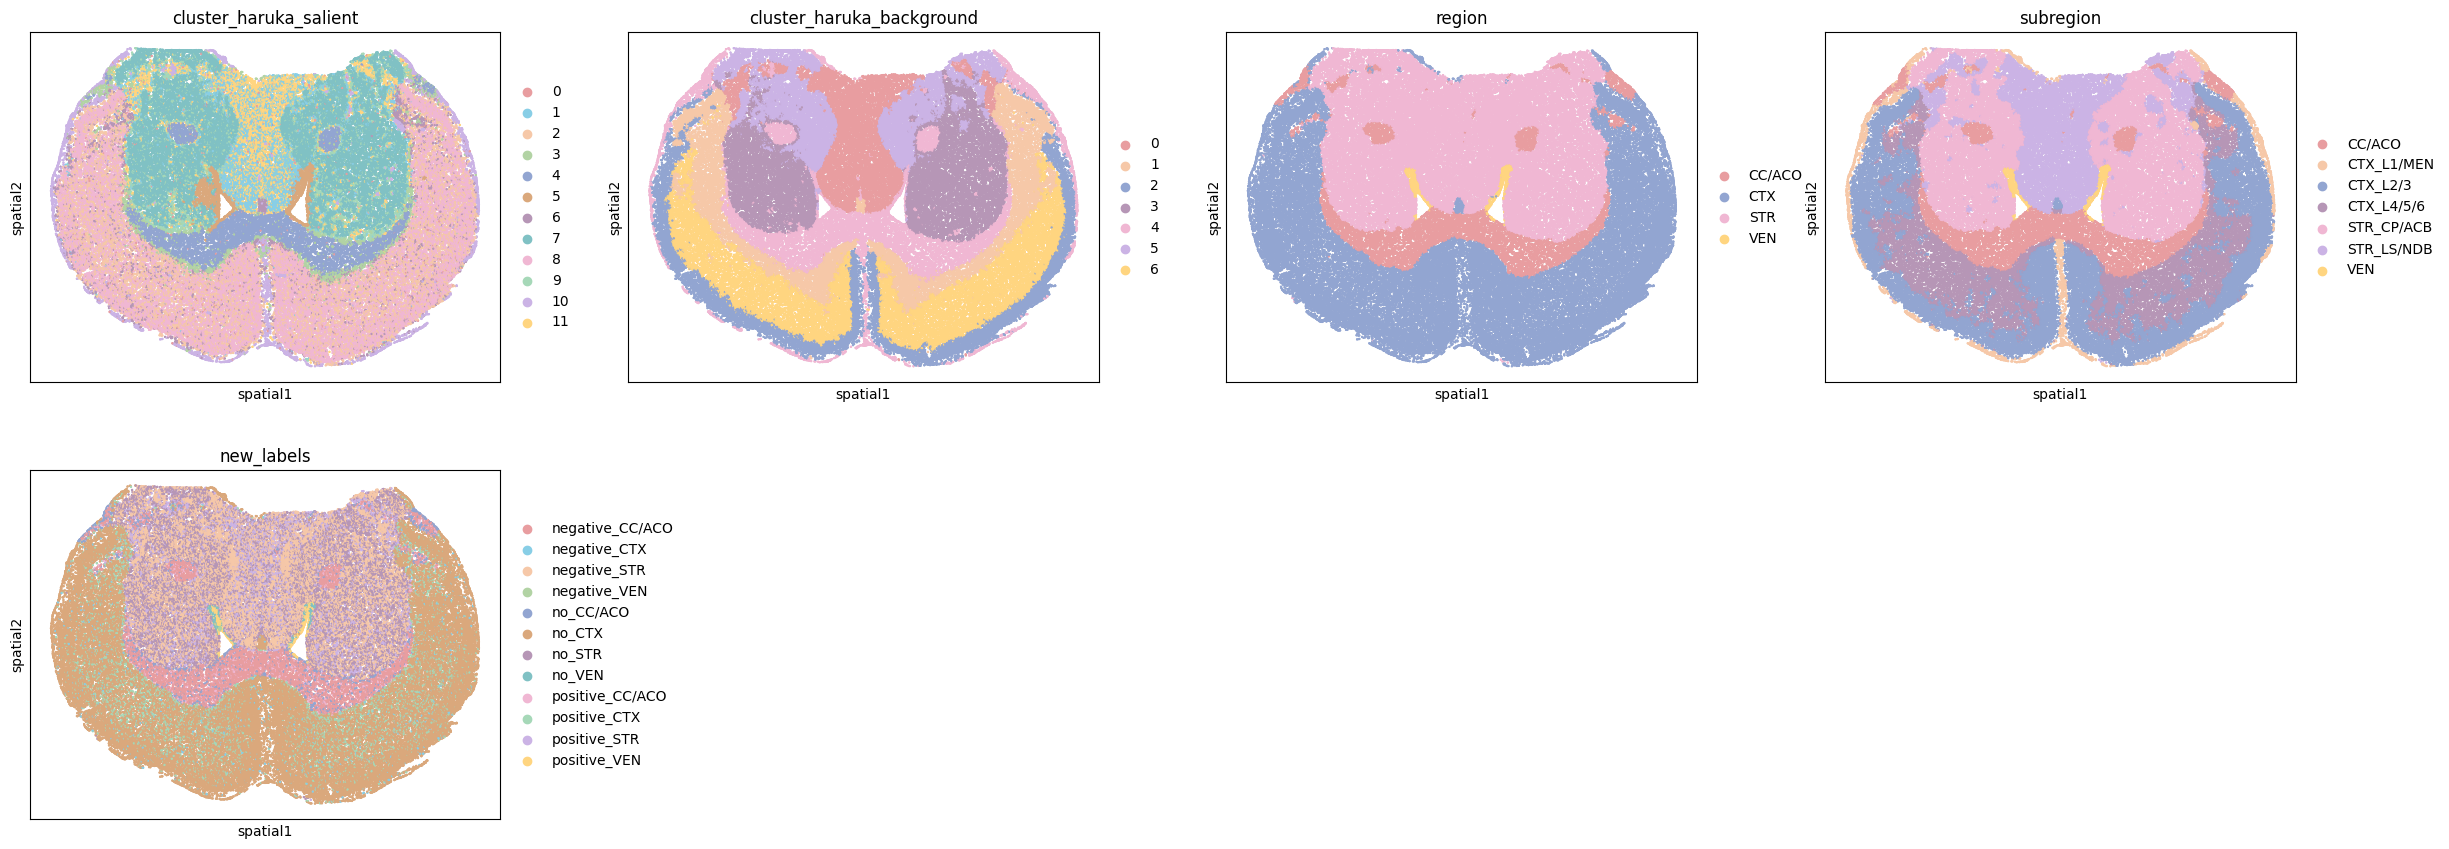

In [4]:
adata_haruka = adata.copy()

import squidpy as sq 

from matplotlib.colors import ListedColormap

colormap = [
    '#E89DA0',
    '#88CEE6',
    '#F6C8A8',
    '#B2D3A4',
    '#92A5D1',
    '#DAA87C',
    '#B696B6',
    '#80C1C4',
    '#F0B7D3',
    '#A6D8B8',
    '#CBB3E5',
    '#FFD580'
]

def run_Haruka(adata):

    model = Haruka(adata, cov_gene_num=32) #32

    model.construct_cov()

    #model.setup_model(gene_likelihood='nb', condition_key='age', wasserstein_penalty=0.4, condition_label=34.5, me_weight=0.4)

    model.setup_model(gene_likelihood='nb', condition_key='age', wasserstein_penalty=0.4, condition_label=34.5, me_weight=0.2)

    model.train(max_epochs=200)
    
    model.extract_rep(n_layer=3)

    model.cluster(background_cluster_number=7, salient_cluster_num=12, seed=33)

    res_haruka = model.output_adata

    return res_haruka 

res_haruka = run_Haruka(adata_haruka)

#res_haruka.write_h5ad('aging_bench_haruka_new.h5ad')

sq.pl.spatial_scatter(res_haruka, shape=None, color=['cluster_haruka_salient', 'cluster_haruka_background', 'region', 'subregion', 'new_labels'], palette=ListedColormap(colormap))